### Autograd

In [5]:
import torch 
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib notebook

torch.Size([60000, 28, 28])
torch.Size([60000])


<IPython.core.display.Javascript object>


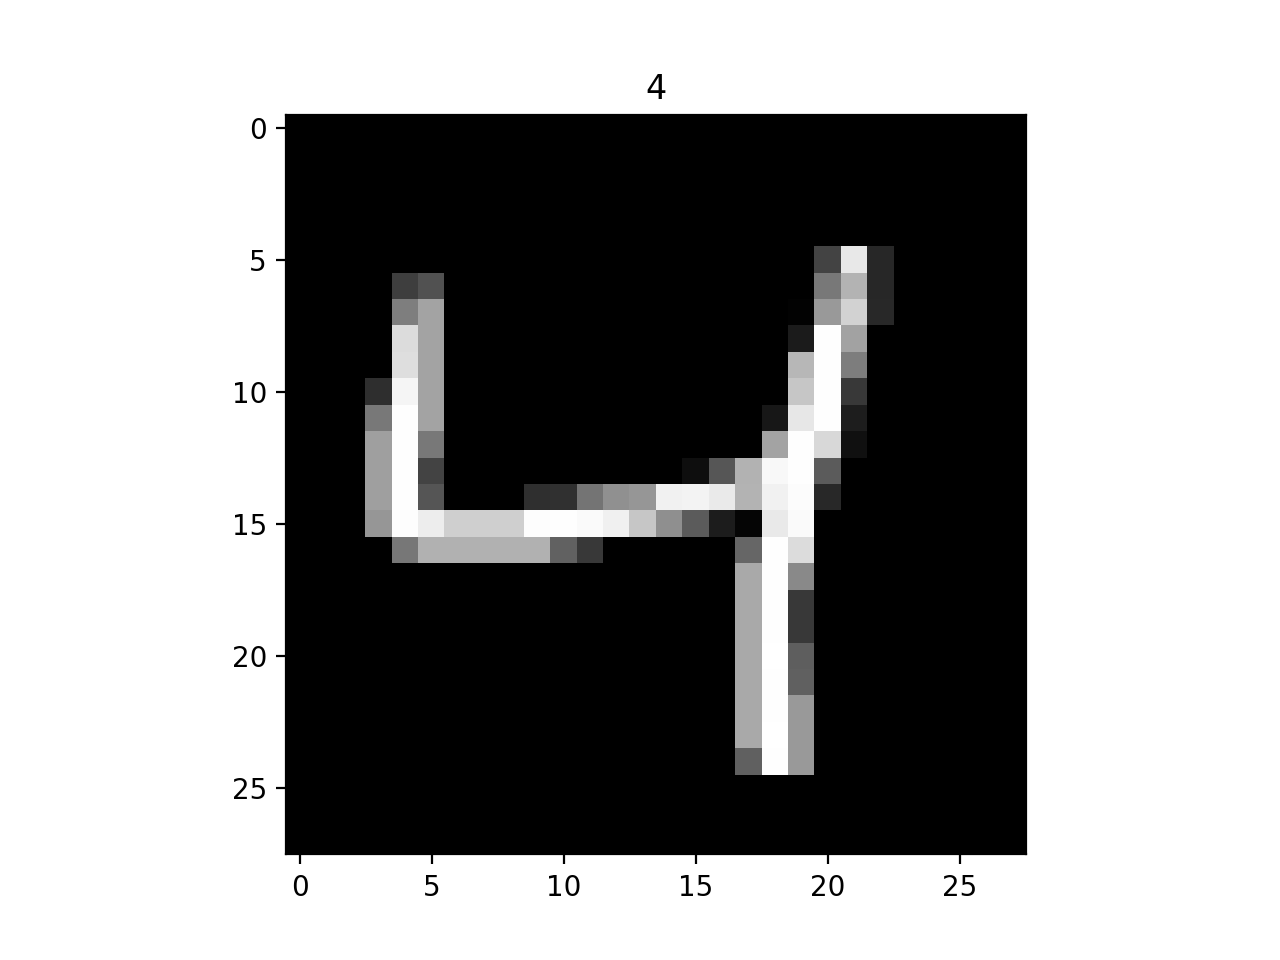

In [6]:
torch.manual_seed(1)

# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005
DOWNLOAD_MNIST = False
N_TEST_IMG = 5

# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform = torchvision.transforms.ToTensor(),
    
    download = DOWNLOAD_MNIST,
)

# plot one example
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[2].numpy(), cmap = 'gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()


<IPython.core.display.Javascript object>


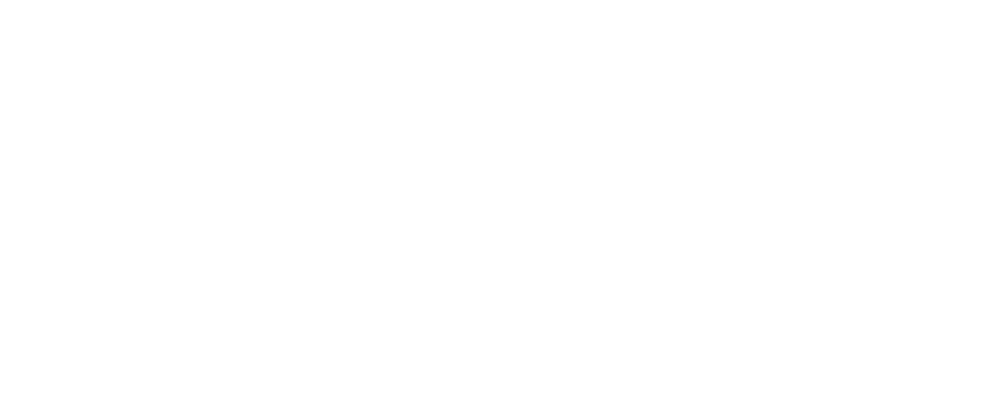

Epoch: 0 | train loss: 0.2333
Epoch: 0 | train loss: 0.0698
Epoch: 0 | train loss: 0.0669
Epoch: 0 | train loss: 0.0711
Epoch: 0 | train loss: 0.0684
Epoch: 0 | train loss: 0.0613
Epoch: 0 | train loss: 0.0586
Epoch: 0 | train loss: 0.0620
Epoch: 0 | train loss: 0.0520
Epoch: 0 | train loss: 0.0526
Epoch: 1 | train loss: 0.0437
Epoch: 1 | train loss: 0.0519
Epoch: 1 | train loss: 0.0474
Epoch: 1 | train loss: 0.0484
Epoch: 1 | train loss: 0.0436
Epoch: 1 | train loss: 0.0422
Epoch: 1 | train loss: 0.0425
Epoch: 1 | train loss: 0.0504
Epoch: 1 | train loss: 0.0375
Epoch: 1 | train loss: 0.0426
Epoch: 2 | train loss: 0.0425
Epoch: 2 | train loss: 0.0414
Epoch: 2 | train loss: 0.0382
Epoch: 2 | train loss: 0.0376
Epoch: 2 | train loss: 0.0425
Epoch: 2 | train loss: 0.0377
Epoch: 2 | train loss: 0.0412
Epoch: 2 | train loss: 0.0411
Epoch: 2 | train loss: 0.0415
Epoch: 2 | train loss: 0.0381
Epoch: 3 | train loss: 0.0380
Epoch: 3 | train loss: 0.0341
Epoch: 3 | train loss: 0.0351
Epoch: 3 |

KeyboardInterrupt: 

In [7]:
train_loader = Data.DataLoader(dataset=train_data, batch_size = BATCH_SIZE,shuffle=True)

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
autoencoder = AutoEncoder()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = LR)
loss_func = nn.MSELoss()

#init Figure
f, a = plt.subplots(2, N_TEST_IMG, figsize = (5, 2))
plt.ion()

# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i],(28, 28)),cmap='gray')
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())
    
for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)
        b_y = x.view(-1, 28*28)
        
        encoder, decoder = autoencoder(b_x)
        
        loss = loss_func(decoder, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print('Epoch:', epoch, '| train loss: %.4f' % loss.data.numpy())
            
            # plooting decoder image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()

# visualize in 3D plot
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()
        

In [8]:
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)    # 提取压缩的特征值
fig = plt.figure(2)
ax = Axes3D(fig)    # 3D 图
# x, y, z 的数据值
X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()  # 标签值
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9))    # 上色
    ax.text(x, y, z, s, backgroundcolor=c)  # 标位子
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()